# Add a scale to group of images

In [77]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t

In [78]:
img = cv2.imread('./pic/IMG_0006.JPG')
scale_img = cv2.imread('./pic/2mm_redline_c2c.JPG')

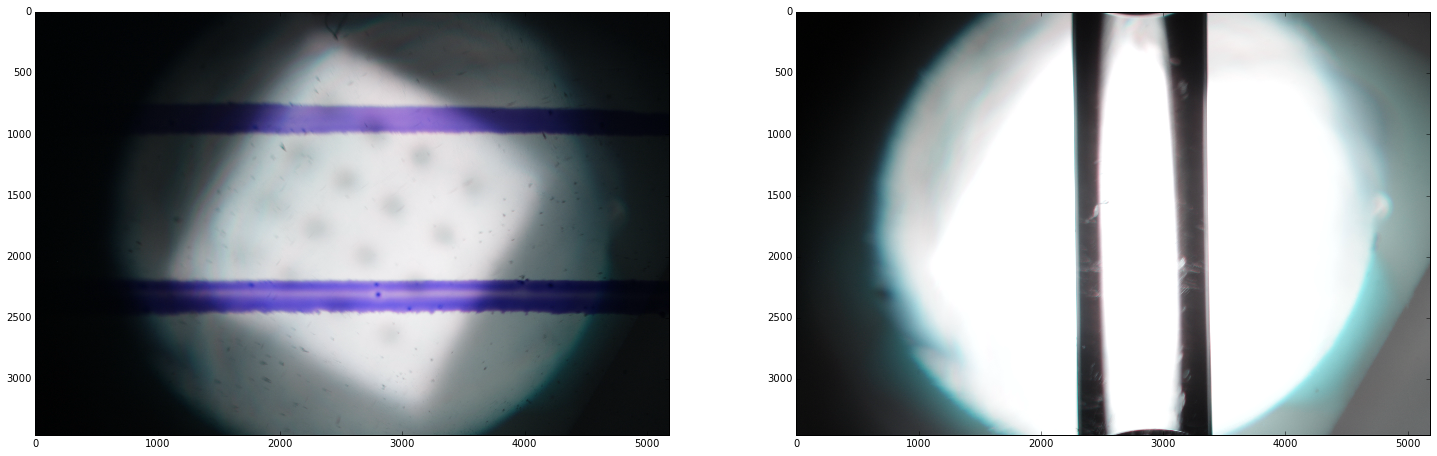

In [79]:
fig01 = plt.figure(1, figsize=(25, 40), dpi=90)
#
plt.subplot(121)
plt.imshow(scale_img, cmap = 'gray')
#
plt.subplot(122)
plt.imshow(img, cmap = 'gray')
#
plt.show()

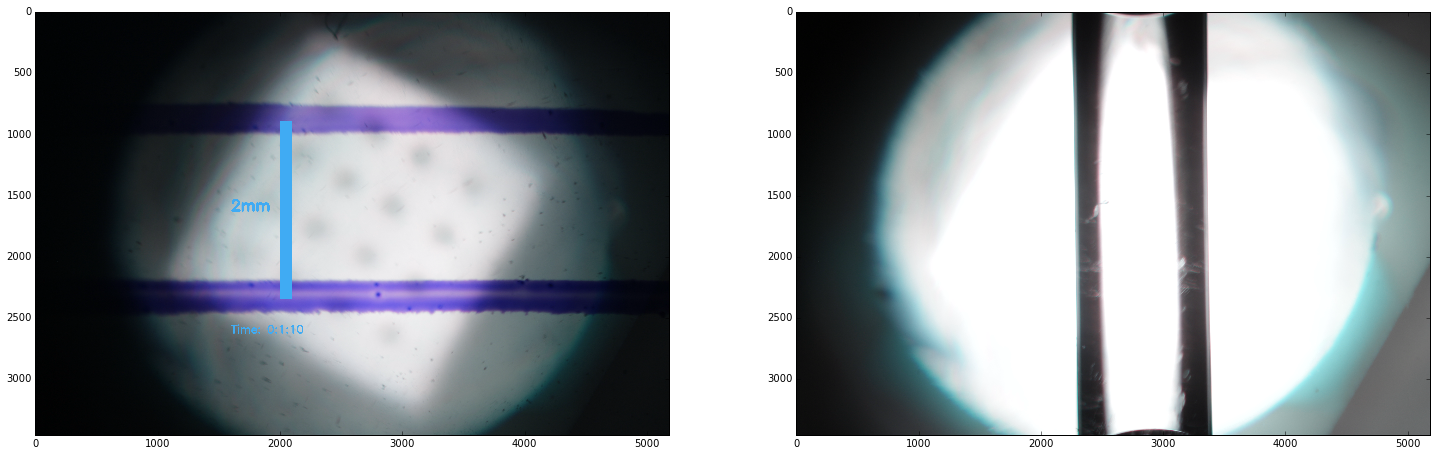

In [81]:
img = cv2.imread('./pic/IMG_0006.JPG')
scale_img = cv2.imread('./pic/2mm_redline_c2c.JPG')
#
top_left = (2000, 900)
bottom_right = (2100, 2350)
color = (64, 171, 243)
cv2.rectangle(scale_img, top_left, bottom_right, color, -1)
font = cv2.FONT_HERSHEY_SIMPLEX
x_txt = top_left[0] - 400; y_txt = int(0.5 * (top_left[1] + bottom_right[1]));
cv2.putText(scale_img, "2mm", (x_txt, y_txt), font, 4, color, thickness=20)
#
time = 70
hr = time/3600
time = time - hr * 3600
minute = time / 60
sec = time - minute * 60

cv2.putText(scale_img, "Time: %d:%d:%d" %(hr, minute, sec), (x_txt, y_txt + 1000), font, 3, color, thickness=10)
#
fig01 = plt.figure(1, figsize=(25, 40), dpi=90)
#
plt.subplot(121)
plt.imshow(scale_img, cmap = 'gray')
#
plt.subplot(122)
plt.imshow(img, cmap = 'gray')
#
plt.show()

In [82]:
path_read = './pic/'
path_write = './processed/'
#
num_pic = 299
# Assuming we start with IMG_0001
for i in xrange(6, num_pic + 6):
    ext = '{0:04}'.format(i)
    img = cv2.imread(path_read + 'IMG_' + ext + '.JPG')
    #
    top_left = (2000, 900)
    bottom_right = (2100, 2350)
    color = (64, 171, 243)
    cv2.rectangle(img, top_left, bottom_right, color, -1)
    #
    font = cv2.FONT_HERSHEY_SIMPLEX
    x_txt = top_left[0] - 450; y_txt = int(0.5 * (top_left[1] + bottom_right[1]));
    cv2.putText(img, "2mm", (x_txt, y_txt), font, 4, color, thickness=20)
    #
    pic_dist = 30
    time = (i-1) * pic_dist 
    hr = time/3600
    hr_str = '{0:02}'.format(hr)
    time = time - hr * 3600
    minute = time / 60
    minute_str = '{0:02}'.format(minute)
    sec = time - minute * 60
    sec_str = '{0:02}'.format(sec)
    cv2.putText(img, 'Time: ' + hr_str + ':' + minute_str + ':' + sec_str, (x_txt, y_txt + 1000),
                font, 3, color, thickness=10)
    # cropping
    y_up = 0; y_down = 3400; h = y_down - y_up;
    x_left = 1500; x_right = 4000; w = x_right - x_left;
    crop_img = img[y_up:y_down, x_left:x_right]
    cv2.imwrite(path_write + 'IMG_' + ext + '.JPG' , crop_img)